## Part 1: Getting Data

In [2]:
#Package installation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import os
from collections import Counter
from sklearn.tree import DecisionTreeRegressor
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from scipy.optimize import curve_fit
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [3]:
#first, take in the likes, dislikes csv
path=r'C:\Users\krazy\Documents\BigData\TechLead'
#path = f"/Users/emilyalameddine/Desktop/School/project"
likes_df = pd.read_csv(path+"/"+'dislike_data.csv')
display(likes_df)

,Unnamed: 0,ID,Likes,Dislikes,View Count
0,0,_1PSvqho8UE,15802,638,289226
1,1,0DNZp5yGjDs,4235,870,77929
2,2,15sU1jyHQ5U,2801,423,63297
3,3,1PSIdXMMn7I,4543,169,75242
4,4,1zJJy-I6aDw,4983,456,100520
...,...,...,...,...,...
70,70,yZSatlqk_0s,3797,1015,108584
71,71,Z1u-FmzTIQE,10755,1175,163195
72,72,ZeYhF2n2yKE,5264,241,111338
73,73,zkBQF9QJLHY,3836,519,88853


## Part 2: TF-IDF

In [4]:
#method to get all comments in a single string for a given video for TF-IDF:
def get_comments_tfidf(vid_id):
    comm_list=''
    df = pd.read_csv(path+"/Comments-TechLead/"+vid_id)
    for index, row in df.iterrows():
        comm_list = comm_list+ df.loc[index, 'Comment']+' ' 
    return comm_list

In [5]:
#get all comments for TF-IDF: in this list, each item is a single string with ALL the comments for a video
all_comments=[]
for index, row in likes_df.iterrows():
    all_comments.append(get_comments_tfidf(likes_df.loc[index, 'ID']+'.csv'))

In [6]:
#preprocess the comments: get rid of stop words, lemmatize words, remove symbols
def preprocess(data):
    data=data.split()
    data = np.char.lower(data) #convert to lowercase

    symbols = "!\"#$%&()*+-./:;<=>?@[\]^_`{|}~\n," #remove punctuation
    for i in symbols:
        data = np.char.replace(data, i, ' ')

    stop_words=stopwords.words('english')

    lemmatizer = WordNetLemmatizer() #converts words to their root form
    ps = PorterStemmer()
    data2=''
    for word in data:
        w = ps.stem(lemmatizer.lemmatize(word))
        if word not in stop_words:
            data2 = data2+w+' '
    data=data2

    return data

In [7]:
#actually preprocess the data
all_comments2 = []
for i in all_comments:
    all_comments2.append(preprocess(i))

In [8]:
#Get the document frequency
DF = {}
for i in range(len(all_comments2)):
    tokens = all_comments2[i]
    for word in tokens.split():
        try:
            DF[word].add(i)
        except:
            DF[word] = {i}

#we don't actually need the list of documents a word appears in, just HOW MANY documents
for i in DF:
    DF[i] = len(DF[i])
    
total_vocab = [x for x in DF]

In [9]:
#find TF-IDF
tf_idf = pd.DataFrame()
for i in range(len(all_comments2)):
    tokens = all_comments2[i]
    counter = Counter(tokens.split())
    for token in np.unique(tokens.split()):
        tf = counter[token]/len(tokens.split())
        df=DF[token]
        idf = np.log(len(all_comments2)/df)
        tf_idf.loc[i, token] = tf*idf
tf_idf=tf_idf.fillna(0)
display(tf_idf)

,0,000,001,03,05,0x,1,10,100,100000,...,squidgam,tfw,tokennn,tsu,twinkl,understat,wagi,woulda,yey,ytuber
0,0.000187,0.000162,0.000638,0.000396,0.000379,0.000691,0.000025,0.000052,0.000208,0.000638,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000062,0.000000,0.000000,0.000000,0.000000,0.000009,0.000052,0.000031,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000095,0.000000,0.000000,0.000000,0.000000,0.000039,0.000123,0.000095,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000093,0.000057,0.000793,0.000000,0.000000,0.000000,0.000127,0.000048,0.000029,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000097,0.000120,0.000000,0.000000,0.000000,0.000000,0.000041,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000027,0.000014,0.000049,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
71,0.000020,0.000155,0.000000,0.000000,0.000000,0.000000,0.000038,0.000021,0.000087,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
72,0.000265,0.000082,0.000000,0.000000,0.000000,0.000000,0.000135,0.000183,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
73,0.000109,0.000135,0.000000,0.000000,0.000000,0.000000,0.000084,0.000057,0.000101,0.000000,...,0.002971,0.001486,0.001486,0.001486,0.001486,0.001486,0.001486,0.001486,0.001486,0.001486


## Part 3: Decision Tree

In [10]:
#add target column to the tf_idf matrix
for index, row in tf_idf.iterrows():
    tf_idf.loc[index, 'ratio_likesdislikes'] = likes_df.loc[index, 'Likes']/(likes_df.loc[index, 'Likes']+likes_df.loc[index, 'Dislikes'])
tf_idf.head()

,0,000,001,03,05,0x,1,10,100,100000,...,tfw,tokennn,tsu,twinkl,understat,wagi,woulda,yey,ytuber,ratio_likesdislikes
0,0.000187,0.000162,0.000638,0.000396,0.000379,0.000691,0.000025,0.000052,0.000208,0.000638,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.961192
1,0.000000,0.000062,0.000000,0.000000,0.000000,0.000000,0.000009,0.000052,0.000031,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.829579
2,0.000000,0.000095,0.000000,0.000000,0.000000,0.000000,0.000039,0.000123,0.000095,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.868797
3,0.000093,0.000057,0.000793,0.000000,0.000000,0.000000,0.000127,0.000048,0.000029,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.964134
4,0.000097,0.000120,0.000000,0.000000,0.000000,0.000000,0.000041,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.916161


In [154]:
#feature selection
X_ta = tf_idf.iloc[:, :-1].to_numpy()
y_ta = tf_idf.iloc[:, -1].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_ta, y_ta)
print(len(y_test))

# Create Decision Tree classifer object
clf = DecisionTreeRegressor()

# Train the classifier
tree= clf.fit(X_train,y_train)

p=clf.predict(X_test)

19


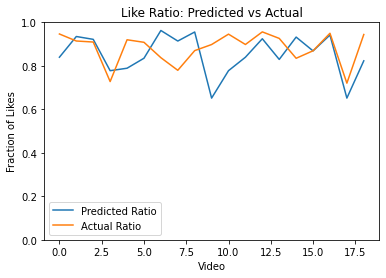

In [156]:
#plot predicted and actual like ratio together for each video to observe trends.
plt.plot(p, label='Predicted Ratio')
plt.plot(y_test, label='Actual Ratio')
plt.legend()
plt.ylim(0,1)
plt.xlabel("Video")
plt.ylabel("Fraction of Likes")
plt.title("Like Ratio: Predicted vs Actual")
plt.show()

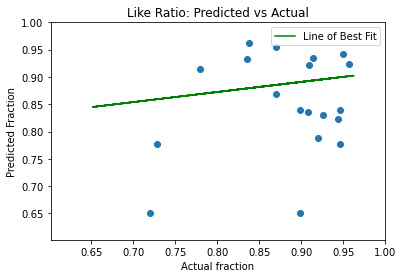

In [157]:
#plot predicted vs actual like ratio
plt.scatter(y_test,p)
m, b = np.polyfit(p, y_test, 1)
plt.plot(p, m*p + b, c='g', label="Line of Best Fit")
plt.xlabel("Actual fraction")
plt.ylabel("Predicted Fraction")
plt.title("Like Ratio: Predicted vs Actual")
min_val = np.min([np.min(p), np.min(y_test)])
plt.legend()
plt.xlim(min_val-0.05,1)
plt.ylim(min_val-0.05,1)
plt.show()

In [160]:
#corr coeff
print(np.corrcoef(y_test,p)[0,1])

0.23889648000547248


## Part 4: Vader

In [35]:
#method to get list of comments for a given video in a form for VADER: each list item is a different comment
def get_comments(vid_id):
    df = pd.read_csv(path+"/Comments-TechLead/"+vid_id)
    return df.loc[:,'Comment']

In [36]:
#method to get sentiment scores for a set of comments
def comments_sentiment(comments_list):    
    model = SentimentIntensityAnalyzer()
    pos_scores=0
    neg_scores=0
    for comment in comments_list:
        scores = model.polarity_scores(comment)
        pos_scores += scores['pos']
        neg_scores += scores['neg']
    num_comments = len(comments_list)
    pos = pos_scores/num_comments
    neg = neg_scores/num_comments
    return pos, neg

## Part 5: Regression based on sentiment scores

In [37]:
#first, take in the likes, dislikes csv to find the ratio for each video
#also, add in sentiment numbers
likes_df = pd.read_csv(path+"/"+'dislike_data.csv')
for index, row in likes_df.iterrows():
    likes_df.loc[index, 'Ratio'] = likes_df.loc[index, 'Likes'] / (likes_df.loc[index, 'Likes']+likes_df.loc[index, 'Dislikes'])
    pos, neg = comments_sentiment(get_comments(likes_df.loc[index, 'ID']+'.csv'))
    likes_df.loc[index, 'Pos Sentiment'] = pos
    likes_df.loc[index, 'Neg Sentiment'] = neg
display(likes_df)

,Unnamed: 0,ID,Likes,Dislikes,View Count,Ratio,Pos Sentiment,Neg Sentiment
0,0,_1PSvqho8UE,15802,638,289226,0.961192,0.147302,0.056602
1,1,0DNZp5yGjDs,4235,870,77929,0.829579,0.134558,0.068465
2,2,15sU1jyHQ5U,2801,423,63297,0.868797,0.169289,0.066537
3,3,1PSIdXMMn7I,4543,169,75242,0.964134,0.260186,0.045308
4,4,1zJJy-I6aDw,4983,456,100520,0.916161,0.150330,0.060231
...,...,...,...,...,...,...,...,...
70,70,yZSatlqk_0s,3797,1015,108584,0.789069,0.166283,0.063646
71,71,Z1u-FmzTIQE,10755,1175,163195,0.901509,0.139861,0.099679
72,72,ZeYhF2n2yKE,5264,241,111338,0.956222,0.237288,0.049178
73,73,zkBQF9QJLHY,3836,519,88853,0.880827,0.223771,0.047656


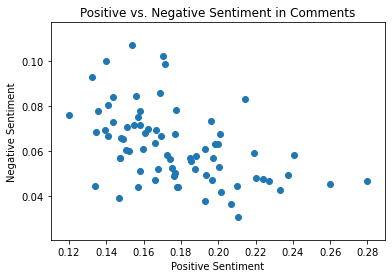

In [45]:
#pos vs neg sentiment graph
pos=likes_df.loc[:, 'Pos Sentiment']
neg=likes_df.loc[:, 'Neg Sentiment']
plt.scatter(pos, neg)
plt.xlabel("Positive Sentiment")
plt.ylabel("Negative Sentiment")
plt.title("Positive vs. Negative Sentiment in Comments")
plt.xlim(np.min(pos)-0.01,np.max(pos)+0.01)
plt.ylim(np.min(neg)-0.01,np.max(neg)+0.01)
plt.show()

In [48]:
#corr coeff for sentiment
print(np.corrcoef(pos, neg)[0,1])

-0.4730543665608463


In [50]:
def logistic_regression(x, w0, w1, w2):
    f=x[0] * w0 + x[1] * w1 + w2
    return 1-(1 / (1 + np.exp(f)))

In [209]:
#define x and y (training set and testing set)
X_ta = likes_df.iloc[:, 6:8].to_numpy()
y_ta = likes_df.iloc[:, 5].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_ta, y_ta)

optimal_params, cov_params = curve_fit(logistic_regression, X_train.T, y_train)
optimal_params

array([  4.48143407, -14.70922222,   1.89506057])

In [211]:
#make predictions on X_test
pred=[]
for i in X_test:
    pred.append(logistic_regression(i, *optimal_params))

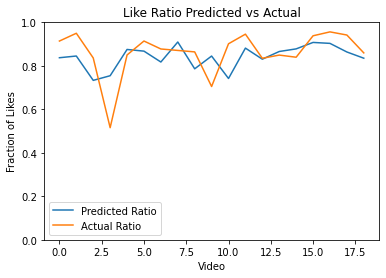

In [212]:
#plot predicted and actual like ratio together for each video to observe trends.
plt.plot(pred, label='Predicted Ratio')
plt.plot(y_test, label='Actual Ratio')
plt.legend()
plt.ylim(0,1)
plt.xlabel("Video")
plt.ylabel("Fraction of Likes")
plt.title("Like Ratio Predicted vs Actual")
plt.show()

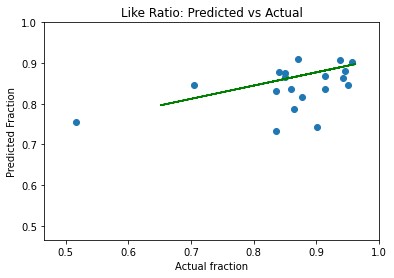

In [213]:
#plot predicted vs actual like ratio
plt.scatter(y_test, pred)
m, b = np.polyfit(p, y_test, 1)
plt.plot(p, m*p + b, c='g')
plt.xlabel("Actual fraction")
plt.ylabel("Predicted Fraction")
plt.title("Like Ratio: Predicted vs Actual")
min_val = np.min([np.min(pred), np.min(y_test)])
plt.xlim(min_val-0.05,1)
plt.ylim(min_val-0.05,1)
plt.show()

In [215]:
#corr coeff
print(np.corrcoef(y_test,pred)[0,1])

0.45167513059616127


## Part 6: Word Couds

In [216]:
from wordcloud import WordCloud
import  matplotlib.pylab as plt

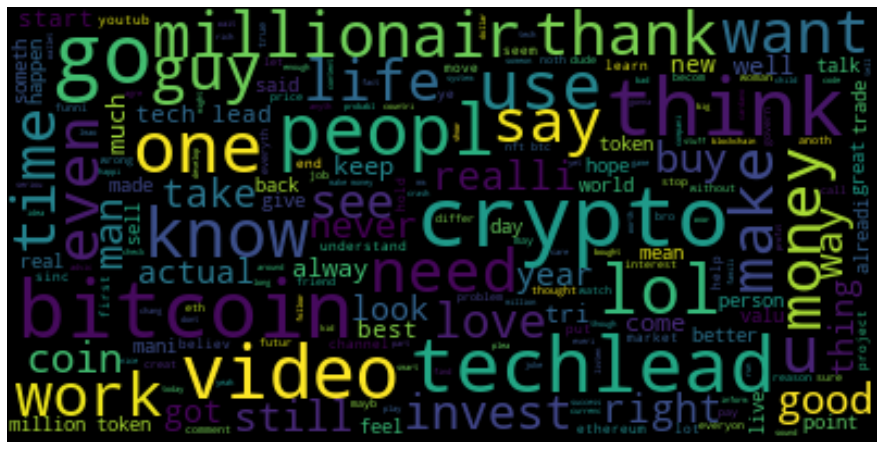

In [217]:
# from all comments
comments_string= " ".join(all_comments2)
wc_comments = WordCloud(max_font_size=40).generate(comments_string)

plt.figure(figsize=(20, 8))

plt.axis("off")
plt.imshow(wc_comments, interpolation="bilinear")

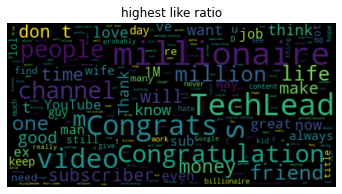

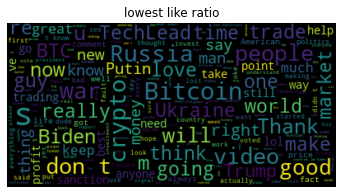

In [218]:
#now, iterate over each file IN the folder
def vid_comments(id):
    comm_list=''
    df = pd.read_csv(path+"/Comments-TechLead/"+id)
    for index, row in df.iterrows():
        comm_list = comm_list+ df.loc[index, 'Comment']+' '
    return comm_list

#highest ratio comment wordcloud
highest_ratio = vid_comments("1PSIdXMMn7I.csv")

wc_highest = WordCloud(max_font_size=40).generate(highest_ratio)
plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
plt.title("highest like ratio")
plt.axis("off")
plt.imshow(wc_highest, interpolation="bilinear")

#lowest ratio comment wordcloud
lowest_ratio = vid_comments("IEmpYqIAivw.csv")

wc_lowest = WordCloud(max_font_size=40).generate(lowest_ratio)
plt.figure(figsize=(20, 8))
plt.subplot(1, 3, 1)
plt.title("lowest like ratio")
plt.axis("off")
plt.imshow(wc_lowest, interpolation="bilinear")

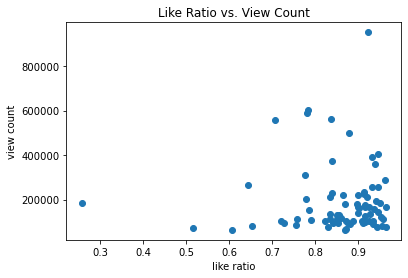

In [220]:
df = pd.read_csv(path+"/"+'dislike_data.csv')
ratio_list =[]
view_list = []
for index, row in df.iterrows():
    df.loc[index, 'Ratio'] = df.loc[index, 'Likes'] / (df.loc[index, 'Likes']+df.loc[index, 'Dislikes'])
    ratio_list.append( df.loc[index, 'Ratio'])
    view_list.append( df.loc[index, 'View Count'])

plt.scatter(ratio_list, view_list)
plt.title("Like Ratio vs. View Count")
plt.xlabel("like ratio")
plt.ylabel("view count")
plt.show()